# NVIDIA Stock Prediction

This notebook is trying to guess the NVIDIA stock price on Decemeber 21th 2023.

I am going to be using a linear regression to try and predict this and the dataset

I am using is not mine it is a Kaggle dataset that can be found [Here](https://www.kaggle.com/datasets/kapturovalexander/nvidia-amd-intel-asus-msi-share-prices?select=Intel+%281980-2023%29.csv)

# Step 0: Imports and Reading in the Data

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [132]:
df = pd.read_csv("NVIDIA (1999-2023).csv")

# Step 1: Data Understanding

In [133]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363215,24403200


In [134]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6094.000000,6094.000000,6094.000000,6094.000000,6094.000000,6.094000e+03
mean,30.987375,31.585369,30.369141,31.003835,30.743154,6.134634e+07
std,59.862014,61.089822,58.564768,59.881405,59.882440,4.399760e+07
min,0.348958,0.355469,0.333333,0.341146,0.313034,1.968000e+06
25%,2.671094,2.750000,2.598027,2.670208,2.450174,3.440110e+07
50%,4.285000,4.377500,4.210000,4.290000,3.946429,5.151250e+07
75%,26.690000,27.198125,26.404999,26.818125,26.440031,7.462690e+07
max,335.170013,346.470001,320.359985,333.760010,333.350800,9.230856e+08


In [135]:
df.shape

(6094, 7)

In [136]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [137]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Step 2: Data Preperation

In [138]:
df = df.rename(columns=({'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume'}))

In [139]:
df['date'] = pd.to_datetime(df['date'])

In [140]:
df.isna().sum() #Nice 0

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [141]:
df['year'] = df['date'].dt.year

# Step 3: Feature Understanding

In [142]:
df['year'].value_counts()

2020    253
2008    253
2011    252
2009    252
2019    252
2016    252
2015    252
2014    252
2013    252
2000    252
2010    252
2005    252
2004    252
2003    252
2002    252
2021    252
2022    251
2007    251
2006    251
2017    251
2018    251
2012    250
2001    248
1999    238
2023     69
Name: year, dtype: int64

[]

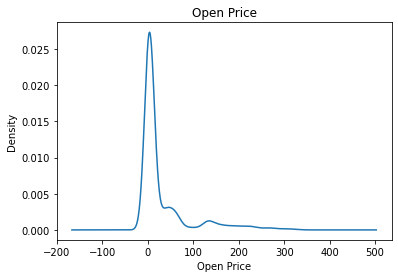

In [143]:
ax = df['open'].plot(kind='kde',
                     title='Open Price')
ax.set_xlabel('Open Price')
plt.plot()

[]

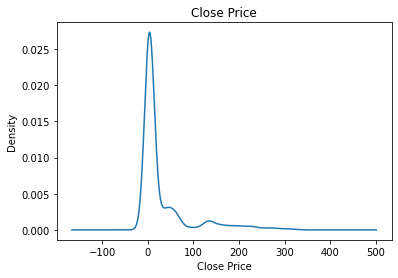

In [144]:
ax = df['close'].plot(kind='kde',
                     title='Close Price')
ax.set_xlabel('Close Price')
plt.plot()

# Step 4: Feature Relationships


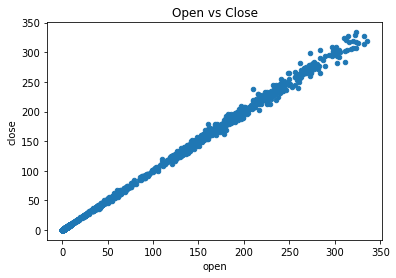

In [145]:
df.plot(kind='scatter',
        x='open',
        y='close',
        title='Open vs Close')
plt.show()

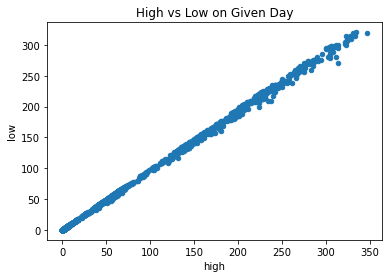

In [146]:
df.plot(kind='scatter',
        x='high',
        y='low',
        title='High vs Low on Given Day')
plt.show()

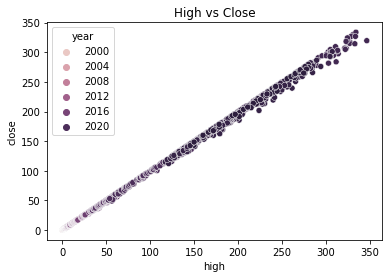

In [147]:
ax = sns.scatterplot(x='high',
                     y= 'close',
                     hue='year',
                     data=df)
ax.set_title('High vs Close')
plt.show()


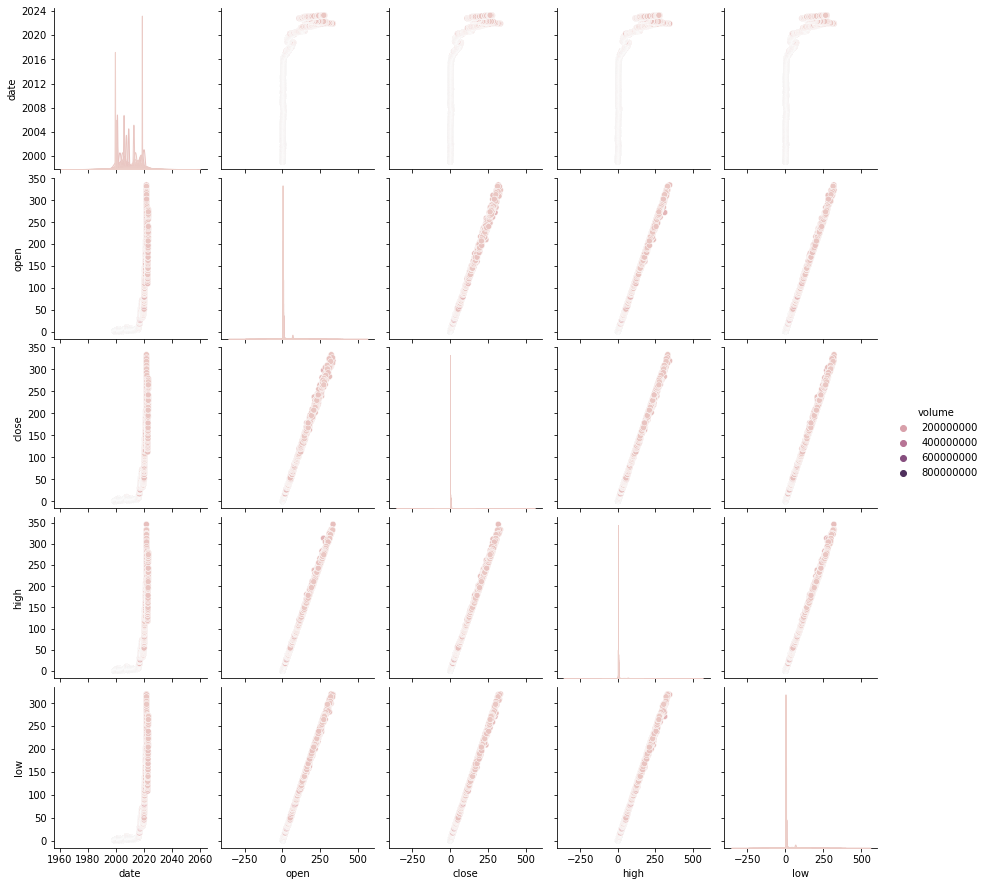

In [148]:
sns.pairplot(df,
             vars=['date','open',
                   'close','high','low'],
            hue='volume')
plt.show()

In [149]:
df_corr = df[['open',
    'close','high','low']].dropna().corr()
df_corr

,open,close,high,low
open,1.000000,0.999475,0.999785,0.999777
close,0.999475,1.000000,0.999765,0.999765
high,0.999785,0.999765,1.000000,0.999736
low,0.999777,0.999765,0.999736,1.000000


<AxesSubplot:>

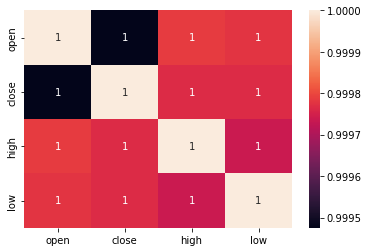

In [150]:
sns.heatmap(df_corr, annot=True)

# Step 5: Asking Questions About the Data

- What was the date with the highest Closing Price?

- What date had the highest Volume?

- What was the date with the biggest jump between open and close?

- What year had the highest average closes


In [151]:
#Question 1:
print(df[df.close == df.close.max()])

#Question 2:
print(df[df.volume == df.volume.max()])

           date        open        high         low      close  adj_close  \
5750 2021-11-29  323.660004  334.119995  320.359985  333.76001   333.3508   

        volume  year  
5750  45496400  2021  
           date      open      high    low     close  adj_close     volume  \
1078 2003-05-09  1.569167  1.794167  1.525  1.780833   1.634086  923085600   

      year  
1078  2003  


In [152]:
# Question 3:
df['open_to_close'] = df.close - df.open
print(df[df.open_to_close == df.open_to_close.max()])
print("\n")
# Question 3v2: Bonus is biggest Loss
print(df[df.open_to_close == df.open_to_close.min()])

           date        open   high         low       close  adj_close  \
5810 2022-02-24  210.149994  238.0  208.899994  237.479996  237.21785   

        volume  year  open_to_close  
5810  73580100  2022      27.330002  


           date        open        high         low       close   adj_close  \
5763 2021-12-16  311.519989  311.600006  280.929993  283.869995  283.556641   

        volume  year  open_to_close  
5763  70736600  2021     -27.649994  


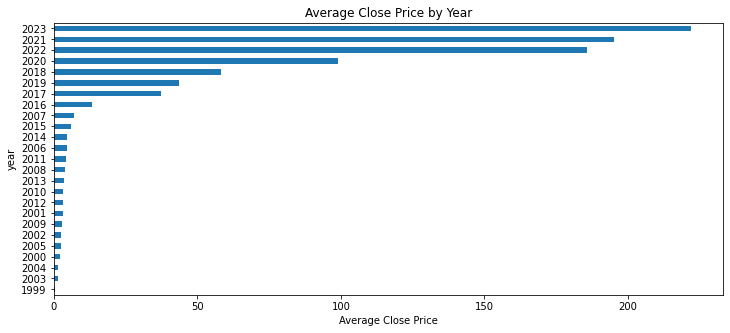

In [153]:
# Question 4: 
df['year'] = df.date.dt.year

ax = df.groupby('year')['close'] \
    .agg(['mean']) \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Close Price by Year')

ax.set_xlabel("Average Close Price")
plt.show()

# Step 6: Predicting the Price

The goal now is to build a linear regression to predict the NVIDIA stock price on December 21st, 2023

In [154]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

train_data = df[df['date'] < pd.Timestamp('2023-12-21')]

prediction_data = train_data.tail(1)

X_train = train_data[['open', 'high', 'low', 'volume', 'open_to_close']]
y_train = train_data['close']
X_pred = prediction_data[['open', 'high', 'low', 'volume', 'open_to_close']]

model = LinearRegression()

model.fit(X_train, y_train)


predicted_close = model.predict(X_pred)

print(f"Model score: {model.score(X_train, y_train)}")
print('Predicted close price on December 21st, 2023:', predicted_close[0])

Model score: 1.0
Predicted close price on December 21st, 2023: 264.95001199916135


In [155]:
def plot_layout():
    plt.figure(facecolor='black', figsize=(12,8))
    ax = plt.axes()
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')
    ax.set_facecolor("black")  

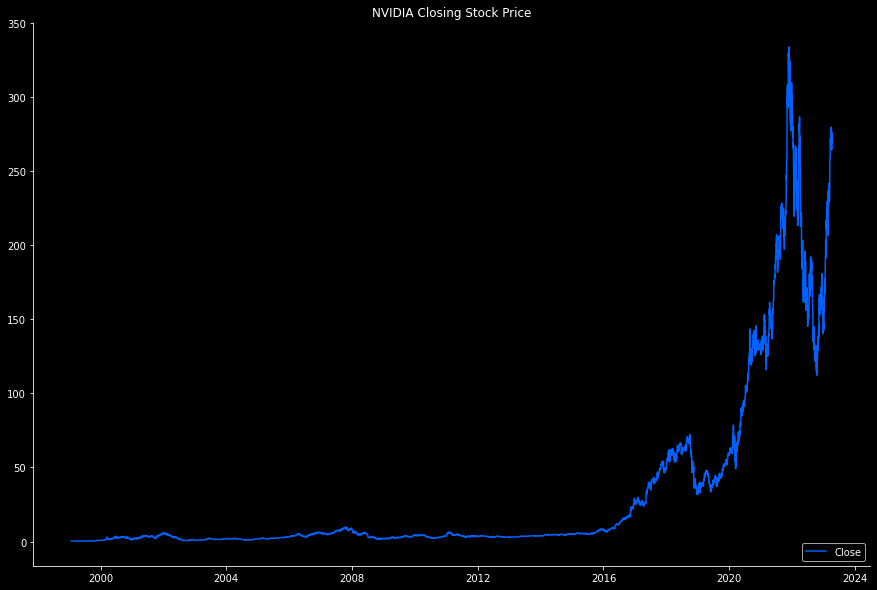

In [156]:
plot_layout()

plt.title('NVIDIA Closing Stock Price', color="white")
plt.plot(df.date, df.close, color="#0061FF")
plt.legend(["Close"], loc ="upper right", facecolor='black', labelcolor='white')

### Final Prediction

My prediction is that on December 21st, 2023 the price of NVIDIA Stock will close at: $264.95